In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def binomial_model(S0,K, T, sigma, r, N,option):

    if option not in ['call', 'put']:
        raise ValueError("Option type must be 'call' or 'put'")

    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S0 * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    if option == 'call':
        option_values = np.maximum(0, asset_prices - K)
    else:
        option_values = np.maximum(0, K - asset_prices)

    # Backward induction to calculate option price at t=0
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]

In [4]:
f_call=binomial_model(100, 100, 1, 0.2, 0.05, 100,'call')
print(f_call)
f_put=binomial_model(100, 100, 1, 0.2, 0.05, 100,'put')
print(f_put)

10.430611662249113
5.553554112321353


In [5]:
def american_binomial_model(S0, K, T, sigma, r, N):

    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S0 * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, asset_prices - K)

    # Backward induction to calculate option price at t=0
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            # Check for early exercise
            asset_price = S0 * (u ** (j - i)) * (d ** i)
            option_values[i] = max(option_values[i], asset_price - K)

    return option_values[0]

In [6]:
f_american=american_binomial_model(100, 10, 1, 0.2, 0.05, 100)
print(f_american)

90.48770575499216


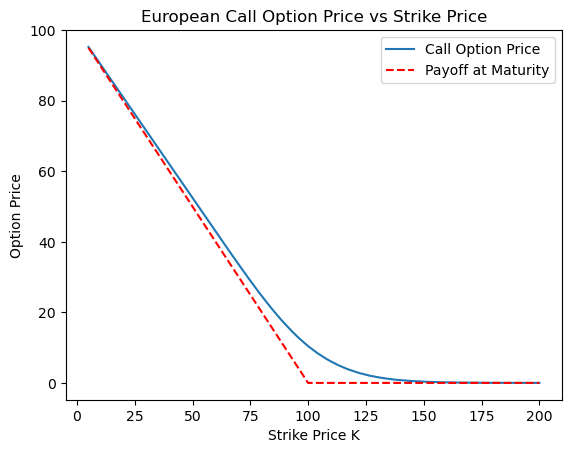

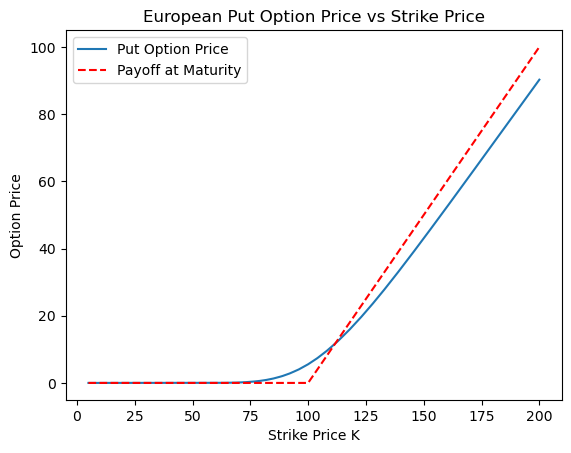

In [7]:
f_call=[binomial_model(100, i, 1, 0.2, 0.05, 100,'call') for i in range(5, 201)]
plt.plot(range(5, 201), f_call,label='Call Option Price')
plt.xlabel('Strike Price K')
plt.ylabel('Option Price')
plt.title('European Call Option Price vs Strike Price')
##PLOT PAYOFF FOR CALL OPTION  
plt.plot(range(5, 201), [max(0, 100 - k) for k in range(5, 201)], linestyle='--', color='red', label='Payoff at Maturity')
plt.legend()
plt.show()

f_put=[binomial_model(100, i, 1, 0.2, 0.05, 100,'put') for i in range(5, 201)]
plt.plot(range(5, 201), f_put,label='Put Option Price')
plt.xlabel('Strike Price K')
plt.ylabel('Option Price')
plt.title('European Put Option Price vs Strike Price')
##PLOT PAYOFF FOR PUT OPTION
plt.plot(range(5, 201), [max(0, k - 100) for k in range(5, 201)], linestyle='--', color='red', label='Payoff at Maturity')
plt.legend()
plt.show()
